12. Credit Card Fraud Detection Dataset
The dataset contains transactions made by credit cards, they are labeled as fraudulent or genuine. This is important for companies that have transaction systems to build a model for detecting fraudulent activities.

12.1 Data Link: Credit card fraud detection dataset

12.2 Data Science Project Idea: Implement different algorithms like decision trees, logistic regression, and artificial neural networks to see which gives better accuracy. Compare the results of each algorithm and understand the behavior of models.

12.3 Source Code: Credit Card Fraud Detection Machine Learning Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('creditcard.csv')

In [2]:
train.shape

(284807, 31)

In [3]:
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
numerical_cols = [f for f in train.columns if train[f].dtypes != 'O']

In [6]:
numerical_cols

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [8]:
len(numerical_cols) ############ all are numerical columns

31

<AxesSubplot:xlabel='Class', ylabel='Count'>

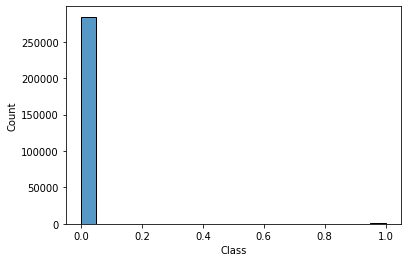

In [9]:
sns.histplot(train['Class'])

In [10]:
train['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [12]:
train['Time'].value_counts()

163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
81790.0      1
54289.0      1
37651.0      1
112892.0     1
119665.0     1
Name: Time, Length: 124592, dtype: int64

In [13]:
train.isnull().sum().any() ########## no missing records

False

In [14]:
train['V1'].value_counts

<bound method IndexOpsMixin.value_counts of 0         -1.359807
1          1.191857
2         -1.358354
3         -0.966272
4         -1.158233
            ...    
284802   -11.881118
284803    -0.732789
284804     1.919565
284805    -0.240440
284806    -0.533413
Name: V1, Length: 284807, dtype: float64>

In [17]:
discrete_features = [ i for i in numerical_cols if len(train[i].unique()) < 25 ]

In [18]:
discrete_features  ############ only one categorical feature - 0 and 1

['Class']

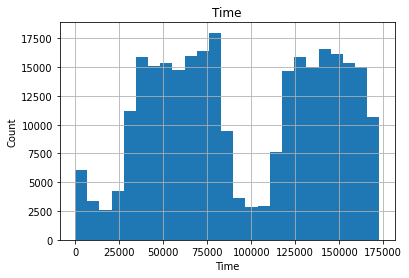

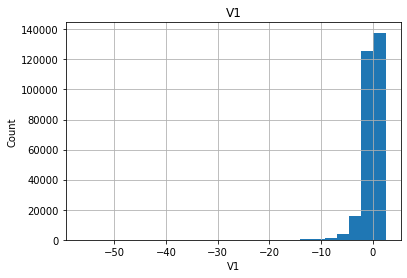

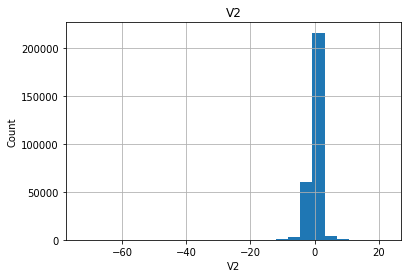

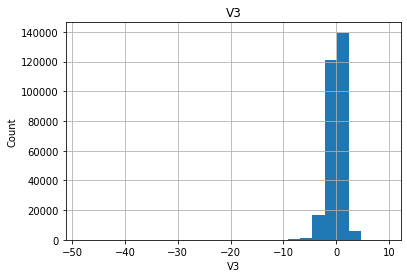

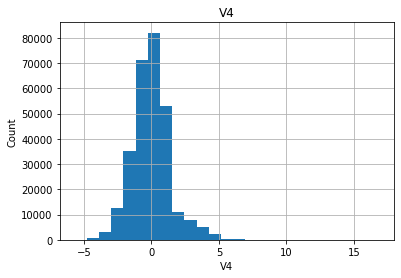

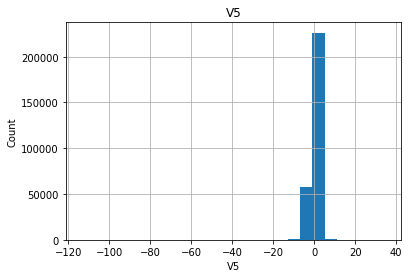

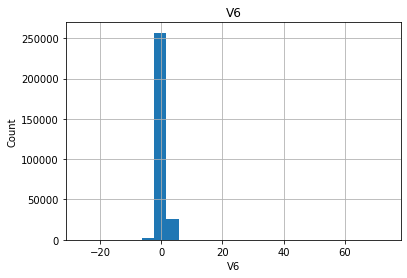

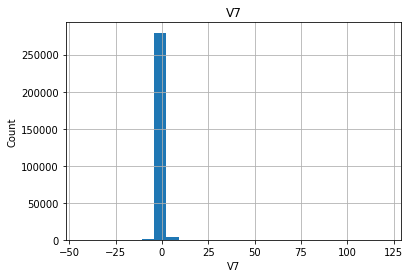

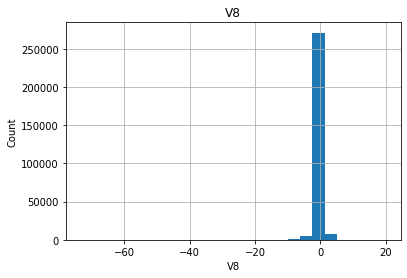

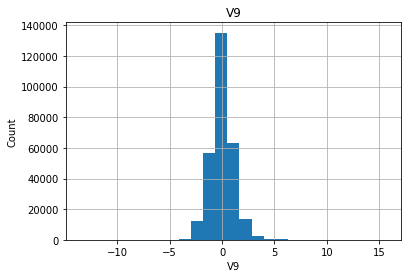

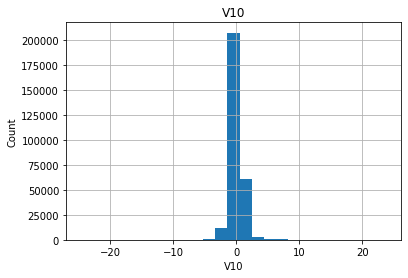

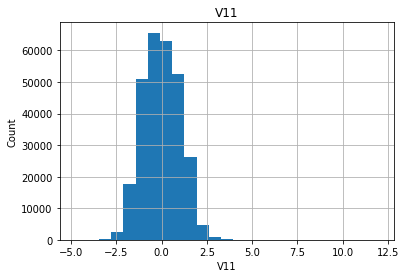

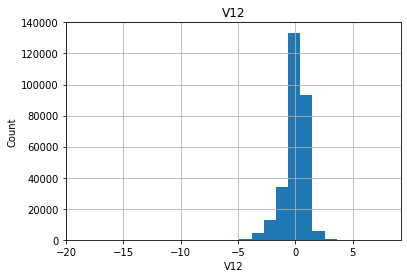

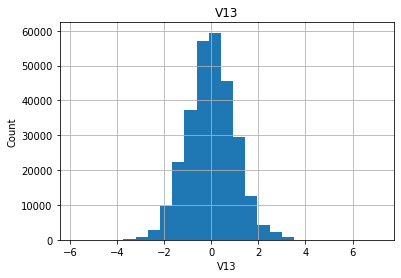

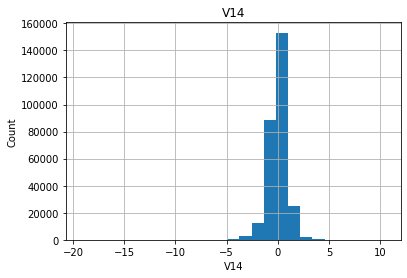

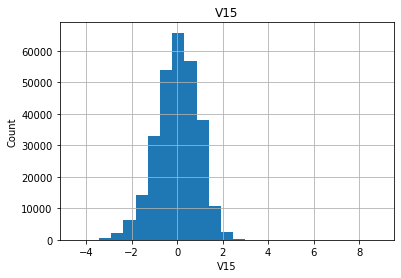

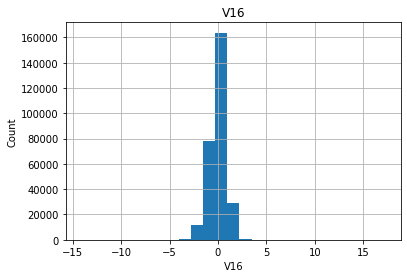

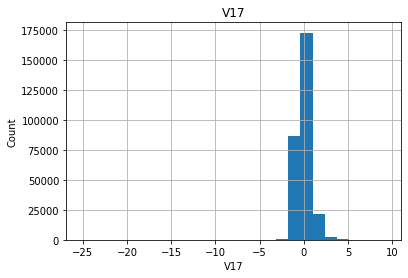

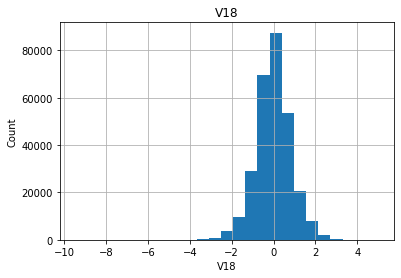

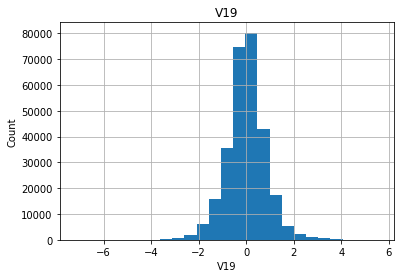

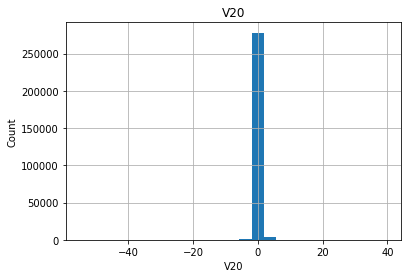

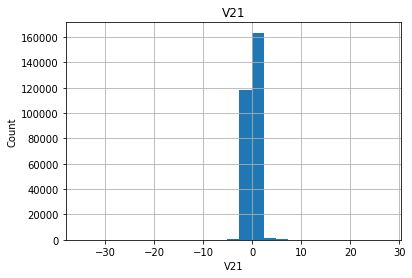

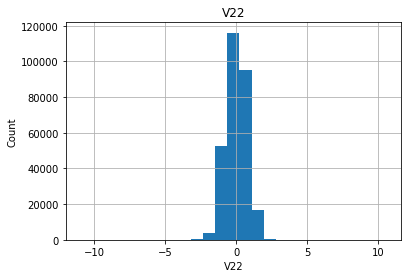

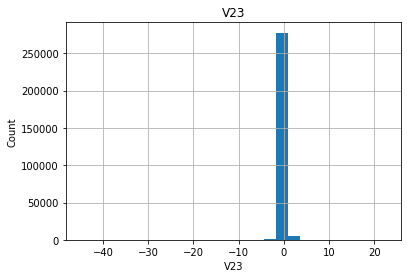

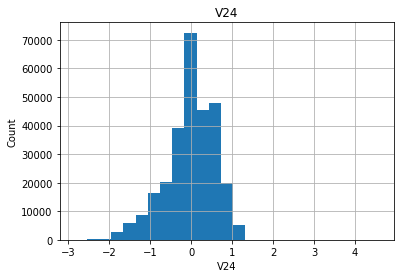

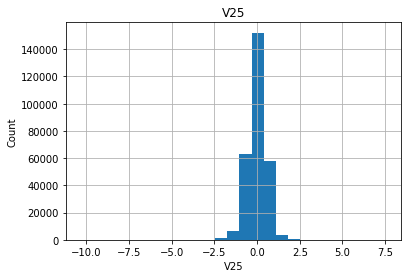

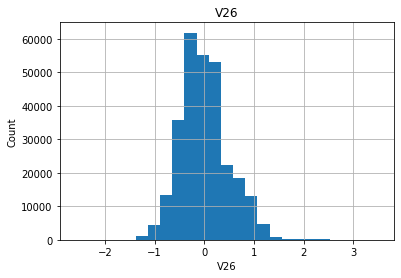

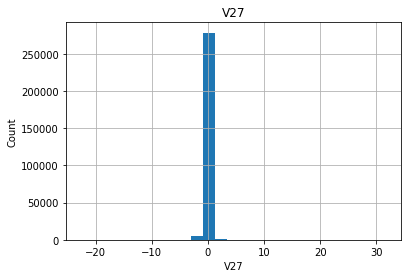

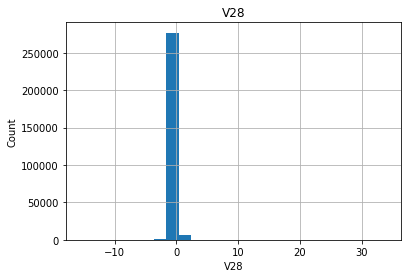

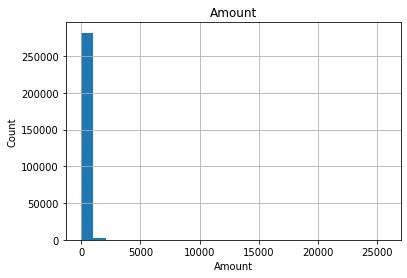

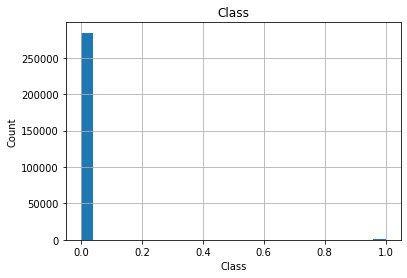

In [19]:
for feature in numerical_cols:
    data=train.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

In [20]:
train['Amount'].value_counts()

1.00      13688
1.98       6044
0.89       4872
9.99       4747
15.00      3280
          ...  
438.10        1
152.29        1
156.45        1
724.44        1
102.77        1
Name: Amount, Length: 32767, dtype: int64

c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Amount'>

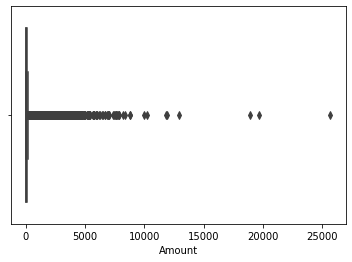

In [21]:
sns.boxplot(train['Amount'])

c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V28'>

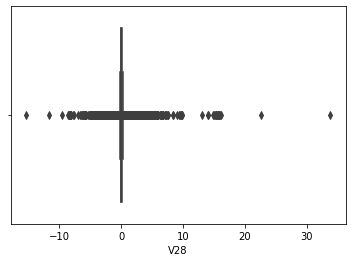

In [22]:
sns.boxplot(train['V28'])

In [23]:
train.shape

(284807, 31)

<AxesSubplot:xlabel='Amount', ylabel='Density'>

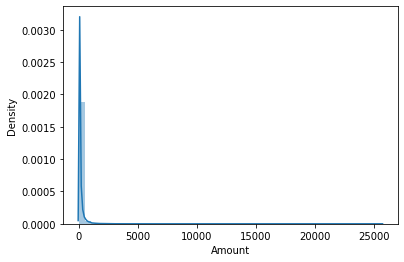

In [26]:
sns.distplot(train['Amount'])

In [29]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [30]:
correlation(train,0.8)

set()

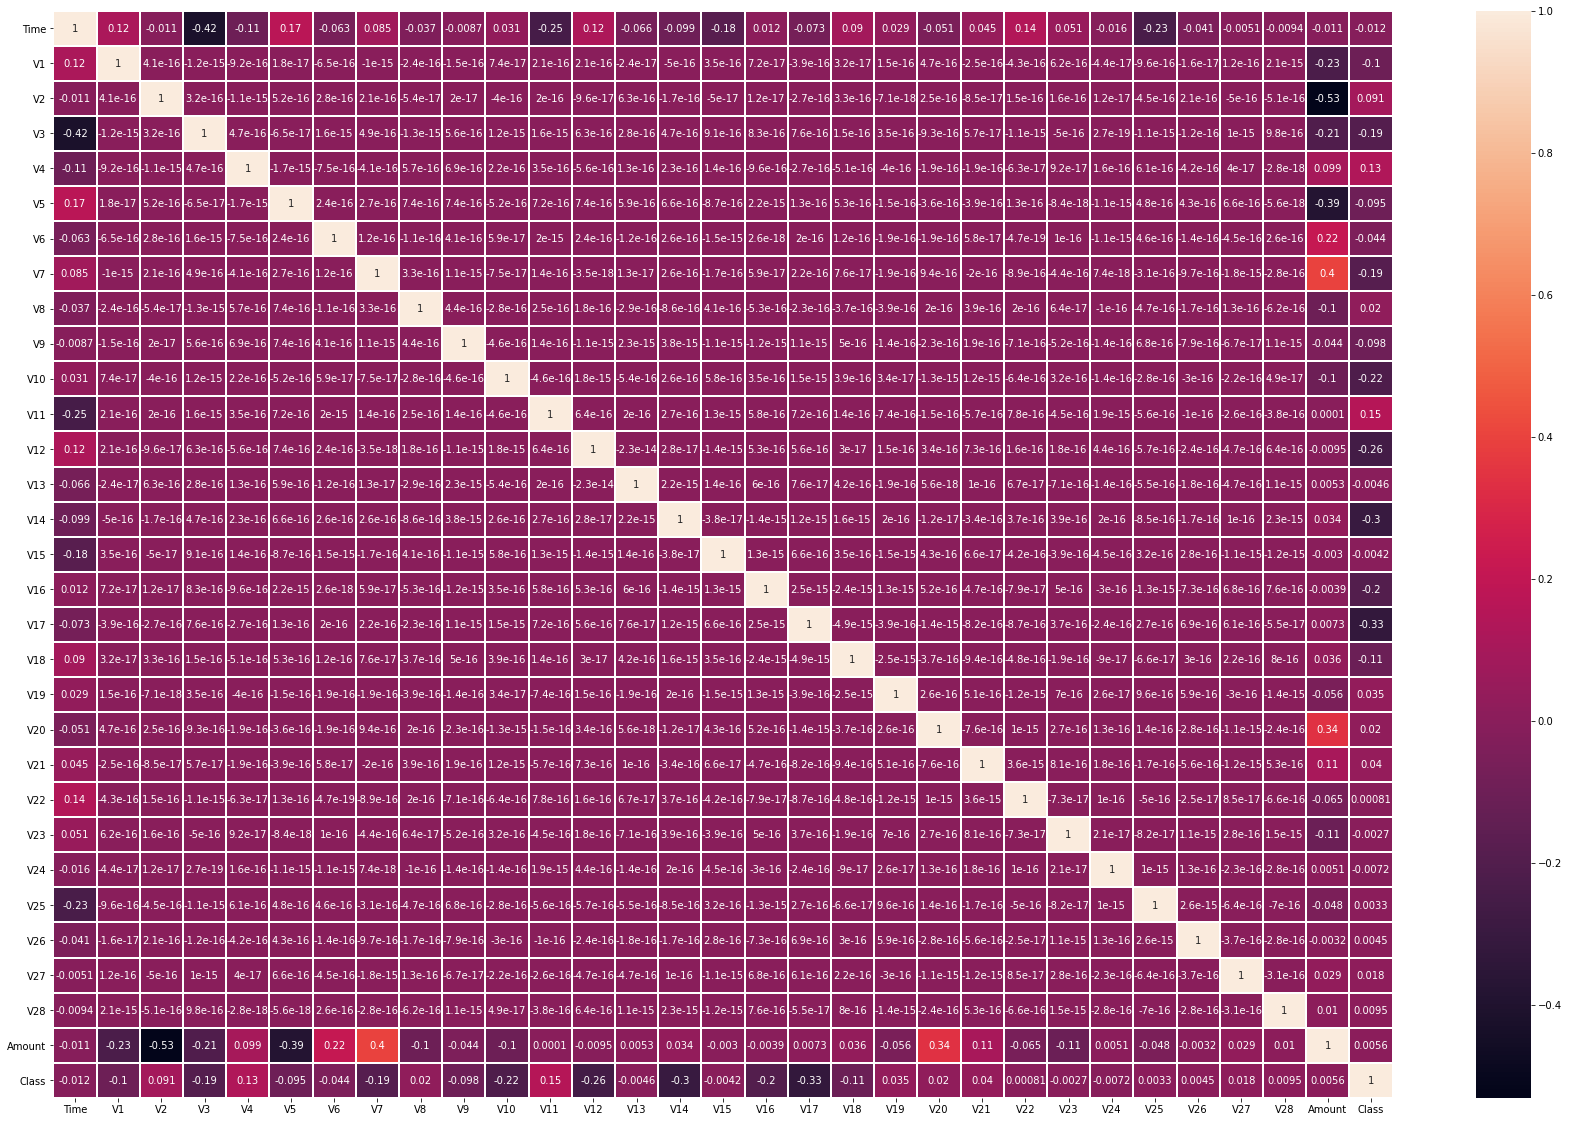

In [33]:
fig, ax = plt.subplots(figsize=(30,20))
sns.heatmap(train.corr(),annot=True,linecolor='white',linewidths=2, ax=ax)
plt.show()

In [28]:
from sklearn.preprocessing import StandardScaler
sm = StandardScaler()

In [37]:
X = train.drop(['Class','Time'],axis=1)
y = train['Class']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)
X_train_scaled = sm.fit_transform(X_train)
X_test_scaled = sm.transform(X_test)

from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(X_train_scaled,y_train)
y_pred = lr_clf.predict(X_test_scaled)


c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

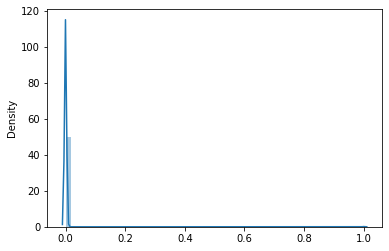

In [38]:
sns.distplot(y_pred)

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_pred))

from sklearn.metrics import accuracy_score
print("accuracy is: " ,accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.85      0.57      0.68       144

    accuracy                           1.00     85443
   macro avg       0.93      0.78      0.84     85443
weighted avg       1.00      1.00      1.00     85443

[[85285    14]
 [   62    82]]
accuracy is:  0.9991105181231933


In [46]:
from sklearn.tree import DecisionTreeClassifier
ex_decision = DecisionTreeClassifier()
ex_decision.fit(X_train_scaled,y_train)
y_pred_dt = ex_decision.predict(X_test_scaled)

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_dt))

from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_pred_dt))

from sklearn.metrics import accuracy_score
print("accuracy is: " ,accuracy_score(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.82      0.74      0.78       144

    accuracy                           1.00     85443
   macro avg       0.91      0.87      0.89     85443
weighted avg       1.00      1.00      1.00     85443

[[85276    23]
 [   37   107]]
accuracy is:  0.9992977774656788
